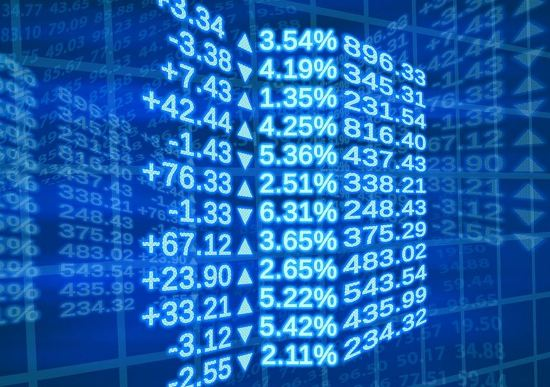

# 주식 예측

## 시계열 예측이란?

남들보다 미래의 정보를 먼저 알 수 있다면 큰 수익을 얻을 수 있다.

아래의 미래 예측 시나리오를 보자

● 지금까지의 주가 변화를 바탕으로 다음 주가 변동 예측  
● 특정 지역의 기후데이터를 바탕으로 내일의 온도 변화 예측  
● 공장 센터 데이터 변화 이력을 토대로 이상 발생 예측

위 예시의 공통점이 무엇일까? 바로 예측의 근거가 되는 시계열(Time-Series) 데이터가 있다는 것이다. 시계열이란 시간 순서대로 발생한 데이터의 수열이라는 뜻이다. 굳이 간단한 수식의 형태를 빌리자면 아래와 같이 표현된다.

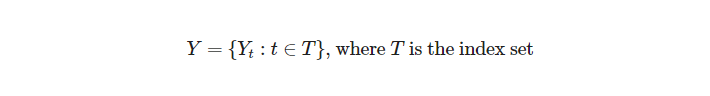

일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야만 하는 것은 아니다. 매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 된다. 이때 날짜가 인덱스(index) 역할을 하게 된다.

주식의 가격 변동 시계열 데이터가 있다하더라도, 미래 예측은 불가능하다. 그럼에도 불구하고 미래의 데이터를 예측하려 든다면 다음 두 가지의 전제가 필요하다.

●과거의 데이터에 일정한 패턴이 발견된다.  
●과거의 패턴은 미래에도 동일하게 반복될 것이다.

위 두 가지 전제는 안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다는 것을 뜻한다.

여기서 안정적(Stationary)이다는 것은 시계열 데이터의 통계적 특성이 변하지 않는다는 뜻이다. 좀 더 직관적으로 표현하자면, 시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다는 뜻이다. 매우 불규칙해 보이는 매일의 날씨 변화에도 불구하고 연 단위 기후 변화의 일정한 패턴이 유지된다면, 지구상의 일정한 기후변동 프로세스가 만들어 내는 안정성(stationarity)에 의해 내일의 기온은 어느 정도 오차 범위 내에서 예측이 가능할 것이다.

시계열 데이터 분석은 완벽한 미래 예측을 보장하지는 않는다. 어떤 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성(stationarity)이 훼손될 여지가 있기 때문이다. 그럼에도 불구하고, 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보인다.

## Stationary한 시계열 데이터

안정적인 시계열(정상 시계열)에서 간의 추이와 관계없이 일정해야 하는 통계적 특성 세 가지는 평균, 분산, 공분산(정확히는 자기공분산-autocovariance이라고 해야 함)이다.

[참고][1]

[1]:https://destrudo.tistory.com/15

우리는 과거 몇 개의 데이터를 통해 다음 데이터를 예측해 보려고 한다.

예시) 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측해보자.

이 예측이 의미가 있으려면 중요한 것은 t에 무관하게 이 예측이 맞아떨어져야 한다는 점이다. t=2010일 때의 데이터를 가지고 X(2011)을 정확하게 예측하는 모델이라면 이 모델에 t=2020을 대입해도 이 모델이 X(2021)을 정확하게 예측할 수 있어야 한다는 것이다. 그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 한다. 또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야 한다. 그렇지 않으면 시계열 예측은 t에 따라 달라지는, 그때그때 다른 예측이 된다. 이것은 "과거의 패턴이 미래에도 반복될 것이다"라는 시계열 예측의 대전제를 무너뜨린다.

In [1]:
# mkdir -p ~/aiffel/stock_prediction/data
# ln -s ~/data/* ~/aiffel/stock_prediction/data

데이터를 준비한다.

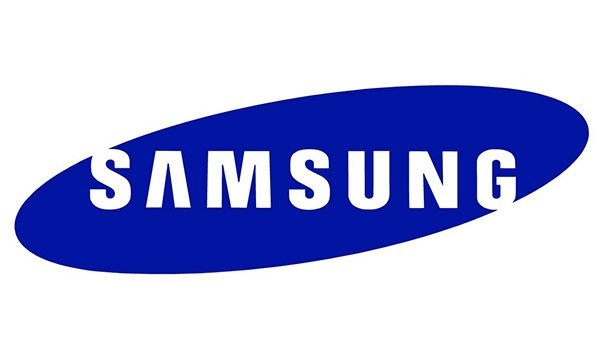

## 삼성전자 주식 시세 예측

### STEP 1 : 시계열 데이터 준비

● 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume

● 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있다.

● 종가(Close)만 사용한다. (주식 시장은 정해진 시간 동안만 거래가 가능하다. 종가란 하루의 장이 마감하였을 때의 가격이다.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

필요한 라이브러리를 불러오고, 데이터 역시 불러온다. 이어서 시계열 데이터 구조로 만들어준다.

### STEP 2 : 각종 전처리 수행

● 결측치 처리

● 로그 변환

In [3]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

이 데이터에는 결측치가 없다. 하지만 결측치가 있었다면 조치가 필요하다. NaN이 들어 있는 데이터는 통계 분석 시에 많은 오류를 일으키고 분석 결과에도 악영향을 미친다.

만약 결측치가 있다면, 두 가지 방법으로 결측치를 처리해 줄 수 있다.

● 결측치가 있는 데이터를 모두 삭제(drop)  
● 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입  
ex) 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식

시간을 index로 가지는 시계열 데이터는 삭제하는 것보다는 보간하는 방법이 좋다. Pandas에서 결측치 보간을 처리하는 메서드는 다음과 같다. 상세한 설명은 이 [아티클][1]을 참고한다.

[1]:https://rfriend.tistory.com/264

In [4]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
# ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
# print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
# plt.plot(ts1)

In [5]:
ts.isnull().sum()

0

In [6]:
# 로그 변환 시도 
ts_log = np.log(ts)

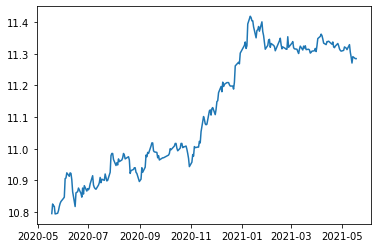

In [7]:
plt.plot(ts_log)

안정적인 시계열로 바꾸기 위해 데이터를 가공/변형하는데 있어 로그함수 변환이 좋다. 시간 추이에 따라 분산이 점점 커지고 있다면 로그함수로 변환 해주는 것이 도움이 된다.

로그 변환의 효과가 어떠했는지 따져 보려면 기존 ts와 ts_log를 Augmented Dickey-Fuller Test 해 보면 된다. p-value가 줄어드는 것을 확인할 수 있고, 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있을 것이다. 이는 STEP 3에서 다뤄볼 것이다.

만약 시간 추이에 따른 평균이 증가한다면 [Moving average 제거 - 추세(Trend) 상쇄하기]를 하면 된다.

### STEP 3 : 시계열 안정성 분석

● 정성적 그래프 분석

● 정량적 Augmented Dicky-Fuller Test

● 시계열 분해(Time Series Decomposition)

● Residual 안정성 확인

● 정성적 그래프 분석

결측치 보간을 하게 될 경우에 쓸 코드를 구동했다면 시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타났을 것이다. 직관적으로 그렇게 보이지만, 시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화해 보겠다.

아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수이다.

현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것이다.

[이동평균][1]이란?

[1]:https://www.econowide.com/3544

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('완료')

완료


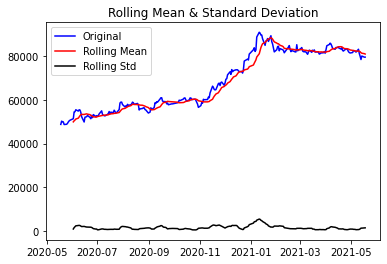

In [9]:
plot_rolling_statistics(ts, window=12)

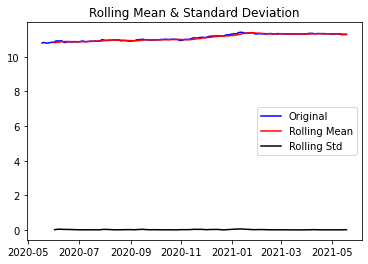

In [10]:
plot_rolling_statistics(ts_log, window=12)

● 정량적 Augmented Dicky-Fuller Test(ADF Test)

Augmented Dickey-Fuller Test(ADF Test)는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법이다.

이 테스트는 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후, 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다는 내용이다.

귀무 가설은 통계학에서 처음부터 버릴 것을 예상하는 가설이다. 차이가 없거나 의미있는 차이가 없는 경우의 가설이며 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설이다.

대립가설의 정의는 “귀무가설이 거짓이라면 대안적으로 참이 되는 가설"이다. 쉽게 설명하면 “귀무가설이 틀렸다고 판단했을 때(기각되었을 때), 대안적으로 선택하는(채택되는) 가설"을 말힌다.

p-value 정의는 “귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본 평균)가 나타날 확률"이다. p값이 낮다는 것은 귀무가설이 참이라는 가정 하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻힌다. 즉 p 값이 매우 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고), 대안적인 가설, 즉 대립가설을 채택하게 된다.

ADF 검정은 정상성을 알아보기 위한 단위근 검정 방법이다. 참고로 단위근(unit root)이란 x=1x=1, y=1y=1인 해로, 시계열 자료에서 예측할 수 없는 결과를 가져올 수 있다.

검정에는 자료에 단위근이 존재한다는 귀무가설(Null Hyperthesis, H0:α=1)과 자료에 단위근이 존재하지 않아 시계열 자료가 정상성을 만족한다는 대립가설(Alternative Hypothesis, H1:α≠1), 이렇게 2가지 가설을 사용하고, 검정을 통해 귀무가설을 기각하면 정상성을 띤다고 볼 수 있다.

조금 더 자세히 설명하면, ADF 검정은 1979년 David Dickey와 Wayne Fuller에 의해 개발된 DF 검정을 일반화한 검정이다. Dickey-Fuller 단위근 검정은 단위근이 존재한다는 귀무가설을 통계적으로 검정하는 방법이다.

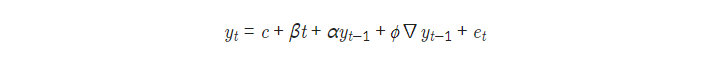

위의 식에서 c는 시계열 데이터의 레벨, β는 시계열 데이터의 추세항이다. 각 파라미터를 regression으로 추정해α가 단위근을 가질 확률을 검정합니다. α=1이면 단위근을 가지는 것이기 때문에 정상성을 띠지 않는다고 판단한다.

ADF 검정은 DF 검정에 p lag의 차분을 추가해 검정 능력을 더 강화시켰다. 식은 아래와 같다.

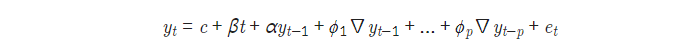

DF 검정의 식에서 p lag의 차분만큼 항이 추가된 것을 알 수 있다. t-pt−p 시점까지의 차분 경향성을 파악할 수 있어서 주기를 가진 데이터의 정상성 여부를 판단할 수 있다.

ADF 검정의 귀무가설은 DF 검정과 귀무가설이 같으므로 검정통계량이 Critical Value보다 작거나 p-value가 설정한 유의수준 값보다 작으면 정상적인 시계열 데이터라고 볼 수 있다.

[유의확률][1]  
[가설,검정, p-value][2]

[1]:https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0
[2]:https://yeomko.tistory.com/37

#### statsmodels 패키지와 adfuller 메서드

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지이다. 이번 학습에서는 statsmodels 패키지의 기능을 자주 활용하게 된다.

In [11]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('완료')

완료


그럼 이전 스텝에서 정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 보자.

In [12]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [13]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


p-value 값이 높기 때문에 귀무가설을 기각하는 것이 불가능하다. 또한 귀무가설을 기각할 수 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없다. 

● 시계열 분해(Time Series Decomposition)

statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있다. 이 기능을 활용하면 우리가 직접 수행했던 moving average 제거, (차분)differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 된다. 이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 본다.

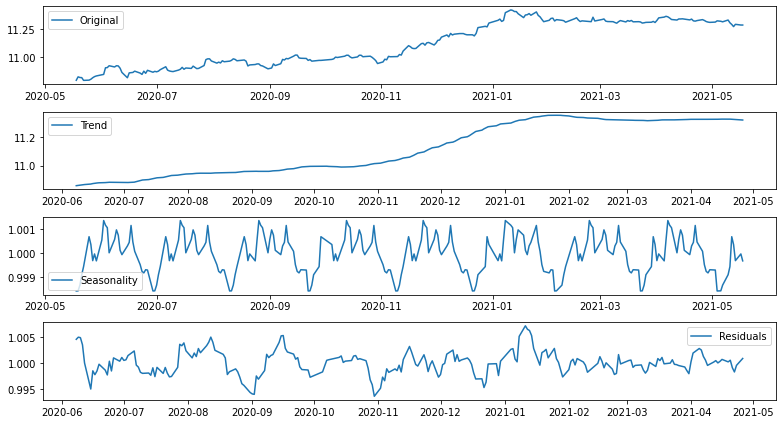

In [14]:
# 정성적 그래프 분석
# plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
# augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 한다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻이다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 준다.

● Residual 안정성 확인

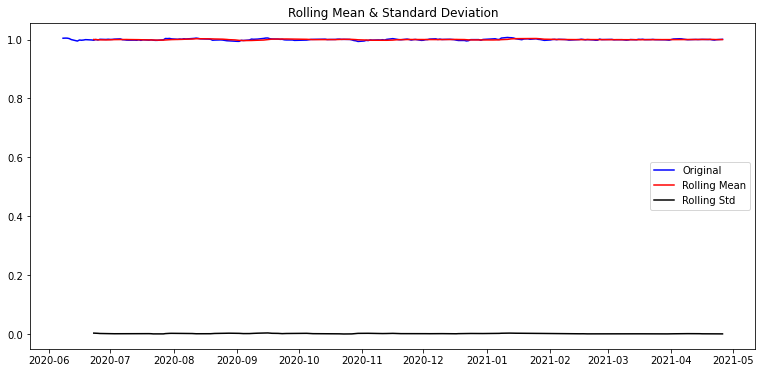

In [15]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [16]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 준다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠다. 어쩌면 굳이 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까? 물론 그렇긴 하다만, 추세(Trend)와 계절성(Seasonality)를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인해보는 것도 좋다.

### STEP 4 : 학습, 테스트 데이터셋 생성

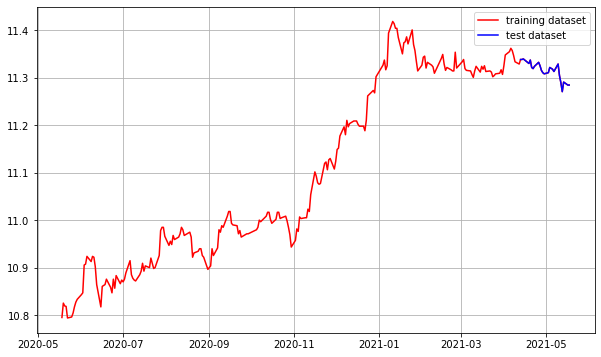

In [17]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기

● ACF, PACF 그려보기 -> p,q 구하기  
● 차분 안정성 확인 -> d 구하기

#### ARIMA 모델의 정의

앞에서 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인했다, 또, Trend와 Seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였다.

ARIMA(Autoregressive Integrated Moving Average)를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있다.

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average) 라고 할 수 있는데, 각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 된다.

● AR(자기회귀, Autoregressive)이란?  
- 과거 값들에 대한 회귀로 미래 값을 예측하는 방법이다.  
- AR은 시계열의 Residual에 해당하는 부분을 모델링한다고 볼 수 있다.  
- 가중치의 크기가 1보다 작은 Y_{t-1}, Y_{t-2}, ..., Y_{t-p}의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치이다.  
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있다.

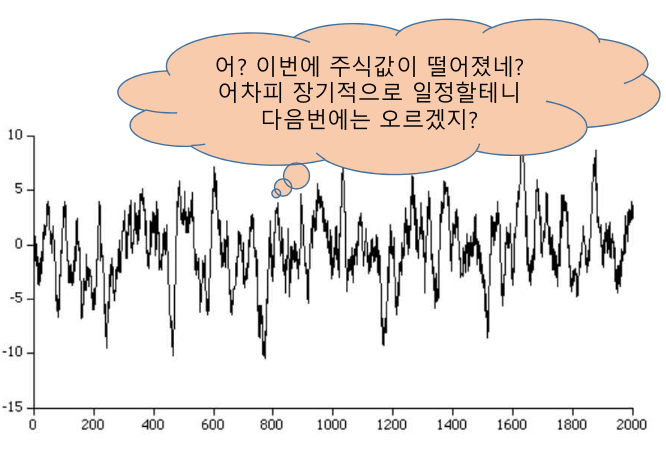

● MA(이동평균, Moving Average)란?

- MA는 Yt가 이전 q개의 예측오차값 et-1, et-2, ..., et-q의 가중합으로 수렴한다고 보는 모델이다.  
- MA는 시계열의 Trend에 해당하는 부분을 모델링한다고 볼 수 있다.  
- 예측오차값 et-1이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻이므로, 다음 Yt 예측 시에는 예측치를 올려잡게 된다.  
- 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점이라고 볼 수 있다.

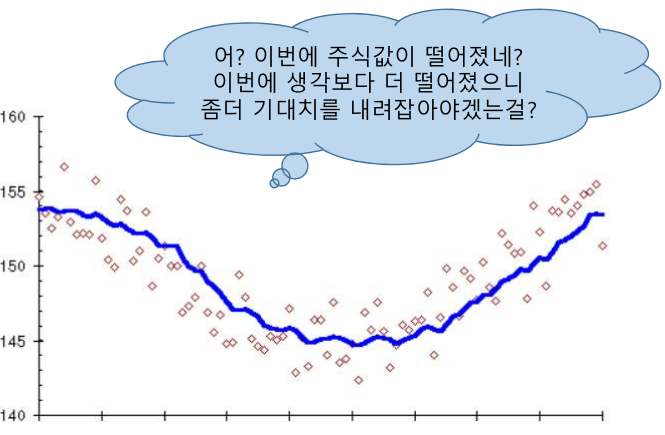

● I(차분 누적, Integration)란?

I는 Yt가 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델이다.  
- I는 시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있다.
- 예를 들어 d=1이라면 Yt는 Yt-1과 ΔYt−1의 합으로 보는 것이다.

ARIMA는 위 3가지 모델을 모두 한꺼번에 고려한다. 이는 주식값을 예측하는 우리의 태도와 비슷한 것 같다.

위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때, '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와 '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오르게 된다.

ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여 준다.

#### ARIMA 모델의 모수 p, q, d

ARIMA를 효과적으로 활용하기 위해서는 ARIMA의 모수(parameter)를 잘 설정해야 한다. 핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다는 것이다.

ARIMA의 모수는 3가지가 있다. p : 자기회귀 모형(AR)의 시차, d : 차분 누적(I) 횟수, q : 이동평균 모형(MA)의 시차이다.

이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데, 이는 p 나 q 중 하나는 0이라는 뜻이다. 이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문이다.

그러면 모수 p, q, d는 어떻게 결정될까?

ARIMA의 적절한 모수 p, d, q를 선택하는 방법으로 많은 통계학적인 시도들이 있지만 대표적인 것만 이야기하면 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)를 말할 수 있다. 이 AutoCorrelation은 자기상관계수와 같은 것이다.

1) ACF

- 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
- 주어진 시계열의 현재 값이 과거(yt-1, yt-2, ...., yt-n) 값과 어떻게 상관되는지 설명함.
- ACF plot에서 X 축은 상관 계수를 나타냄, y축은 시차 수를 나타냄

2) PACF

- 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수
- k 이외의 모든 시차를 갖는 관측치(yt-1, yt-2, ...., yt-k+1)의 영향력을 배제한 가운데 특정 두 관측치, yt와 yt-k가 얼마나 관련이 있는지 나타내는 척도

statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용한다.

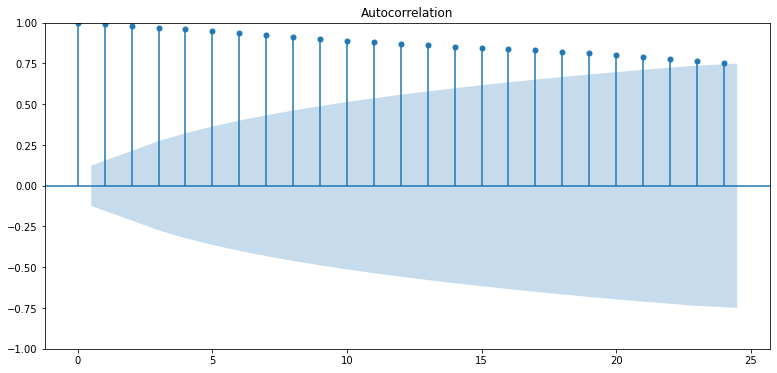

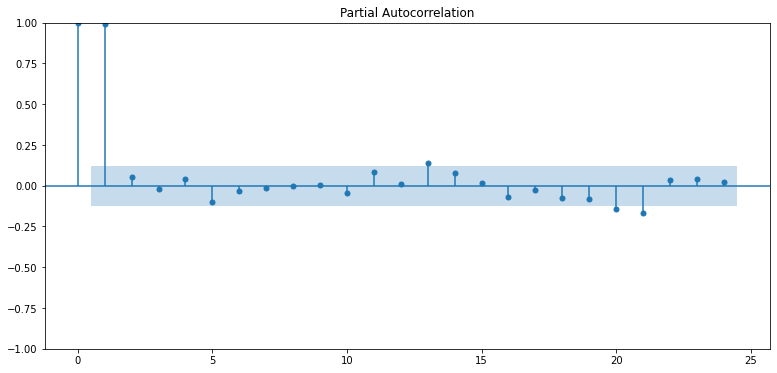

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약 결론 부분만 가져온 것이다.

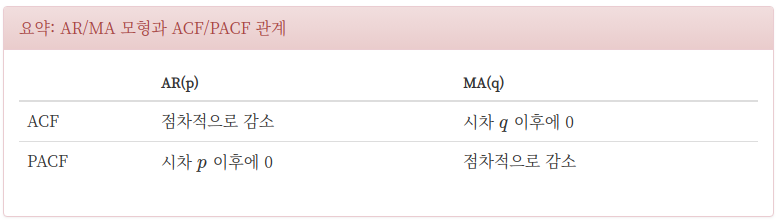

d를 구하기 위해서는 좀 다른 접근이 필요하다. d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 한다.

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


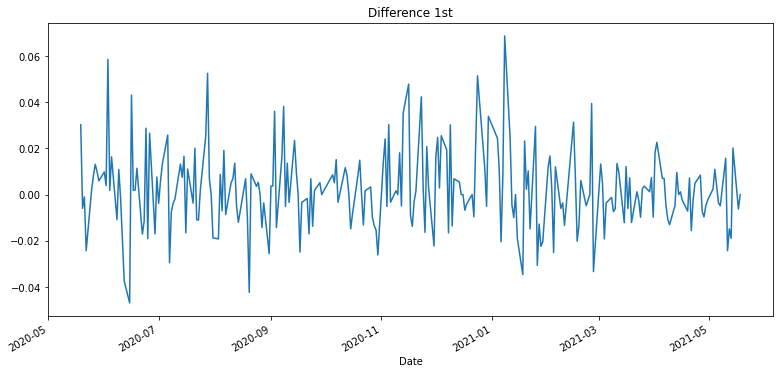

In [19]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


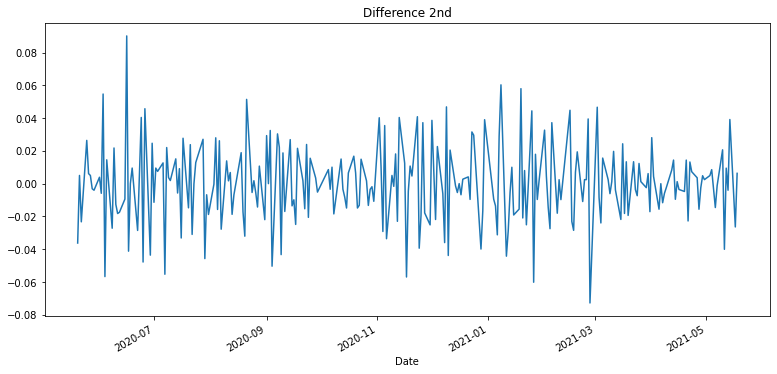

In [20]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

d 값도 바꿔 가면서 최적의 값을 찾아봐야 한다.

In [21]:
# 학습 데이터 분리
# 아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리한다.
# 분리 비율은 학습과 테스트에 9:1로 한다.
# 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당하다.

In [22]:
# train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
# plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
# plt.plot(test_data, c='b', label='test dataset')
# plt.legend()

In [23]:
# print(ts_log[:2])                    # 이 코드는 데이터셋의 형태를 확인하는 방법이다.
# print(train_data.shape)
# print(test_data.shape)

### STEP 6 : ARIMA 모델 훈련과 테스트

● ARIMA 모델 빌드와 훈련  
● 모델 테스트 및 플로팅  
● 최종 예측 모델 정확도 측정(MAPE)

In [24]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 17 Feb 2022   AIC                          -1156.722
Time:                        07:32:20   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [25]:
# fitted_m = fitted_m.predict()
# fitted_m = fitted_m.drop(fitted_m.index[0])
# plt.plot(fitted_m, label='predict')
# plt.plot(train_data, label='train_data')
# plt.legend()

In [26]:
# model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
# fitted_m = model.fit() 
# fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
# fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
# plt.figure(figsize=(9,5), dpi=100)
# plt.plot(train_data, label='training')
# plt.plot(test_data, c='b', label='actual price')
# plt.plot(fc_series, c='r',label='predicted price')
# plt.legend()
# plt.show()

ARIMA 모델의 훈련 결과를 시각적으로 확인해 보았다. 예측과 train_data의 흐름이 비슷하다.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


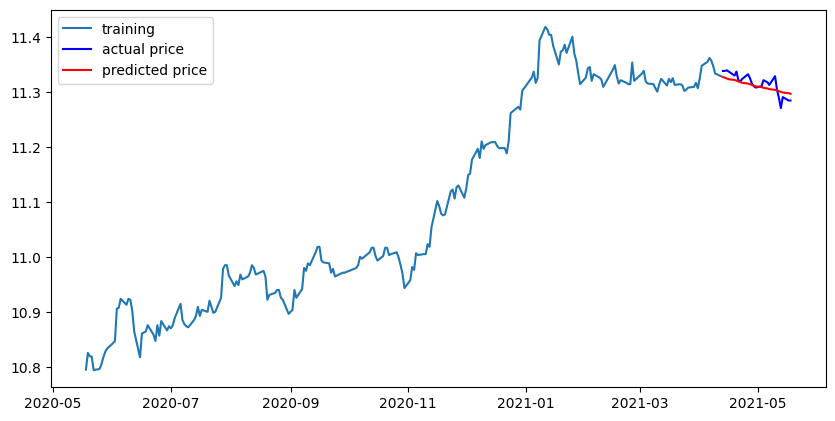

In [27]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 보았다. 실제와 예측의 흐름은 비슷하다.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있다. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산한다.

MAPE는 1.03%이다. p, d, q 중 p와 q는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데, 여기서는 이를 적용하지 않았다. p, d, q를 각각 2, 0, 1을 사용했는데 결과가 더 좋은 것 같다. 이는 적당한 모수를 찾게 될 시, 더 최적화된 모델을 만들수 있다는 것을 뜻한다.

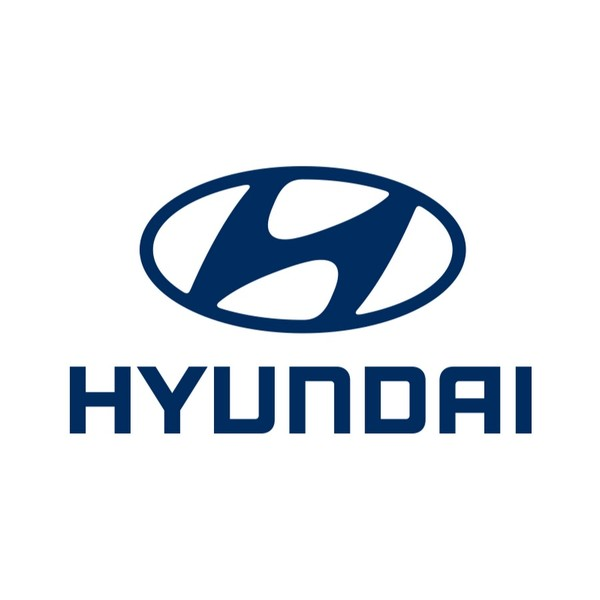

## 현대자동차 주식 시세 예측

In [29]:
# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005380.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-17    243500.0
2021-02-18    235500.0
2021-02-19    242000.0
2021-02-22    241500.0
2021-02-23    244500.0
Name: Close, dtype: float64

In [30]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [31]:
ts.isnull().sum()

0

In [32]:
# 로그 변환 시도 
ts_log = np.log(ts)

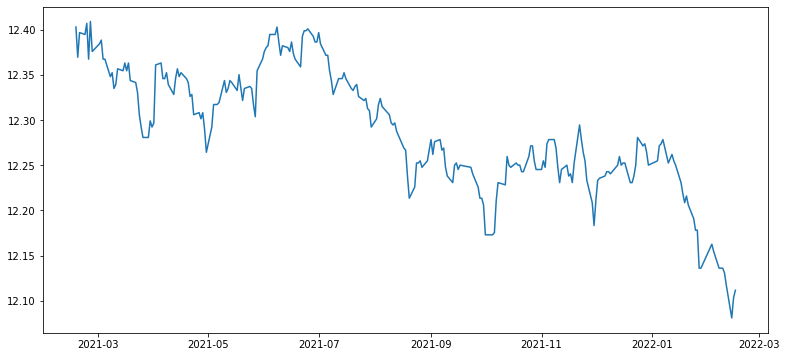

In [33]:
plt.plot(ts_log)

In [34]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('완료')

완료


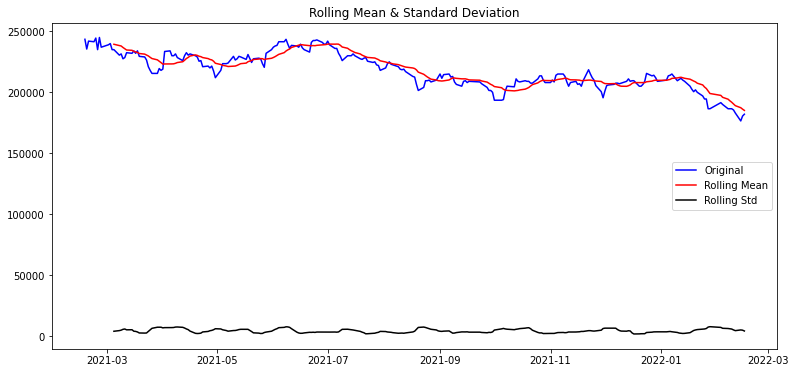

In [35]:
plot_rolling_statistics(ts, window=12)

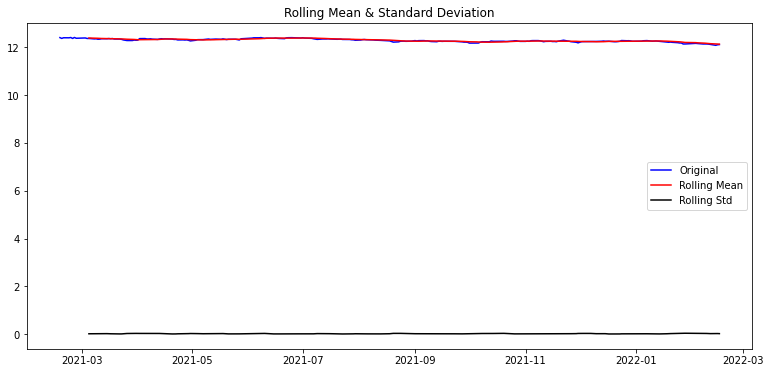

In [36]:
plot_rolling_statistics(ts_log, window=12)

In [37]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('완료')

완료


In [38]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.163966
p-value                          0.688901
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [39]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.994214
p-value                          0.755369
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


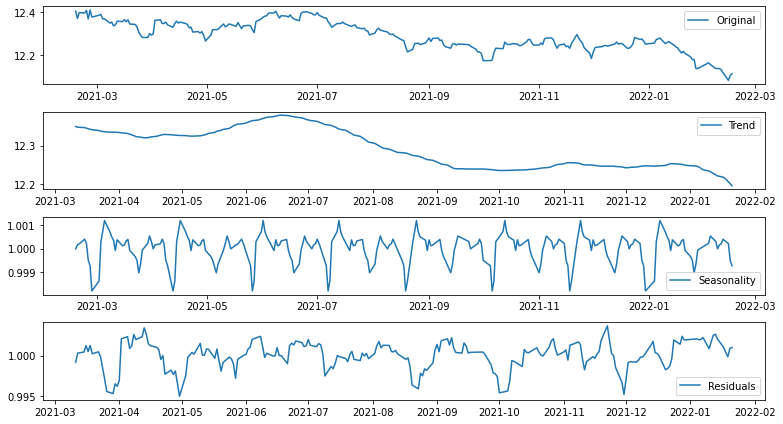

In [40]:
# 정성적 그래프 분석
# plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
# augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

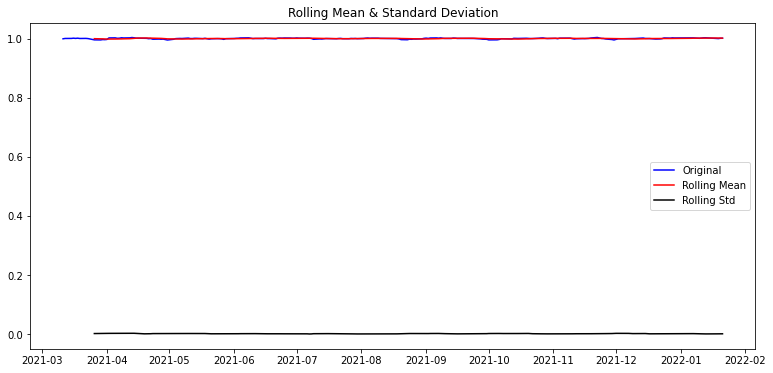

In [41]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [42]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.896969e+00
p-value                        2.836396e-07
#Lags Used                     4.000000e+00
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


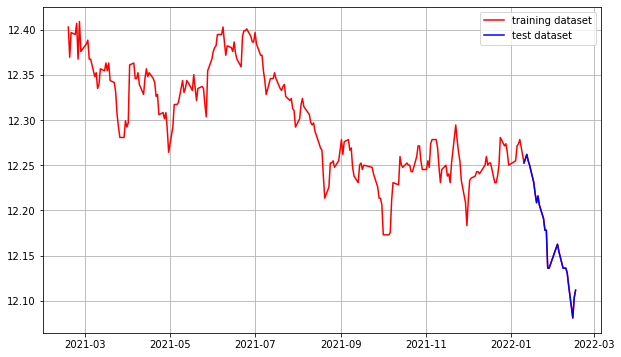

In [43]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

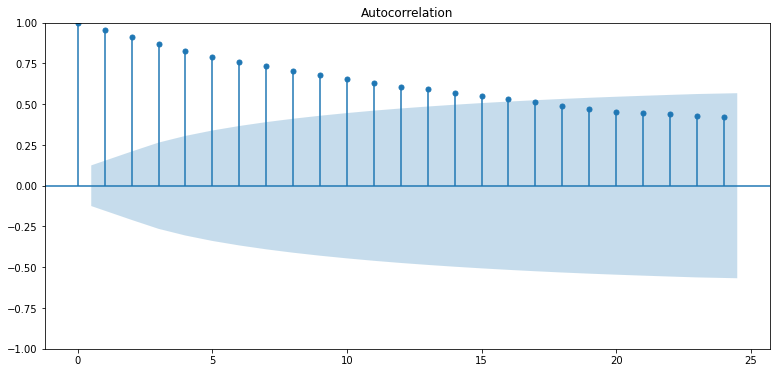

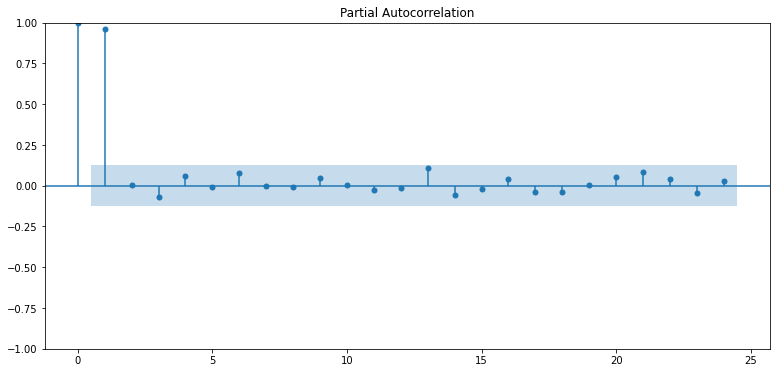

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.160234e+01
p-value                        2.630405e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


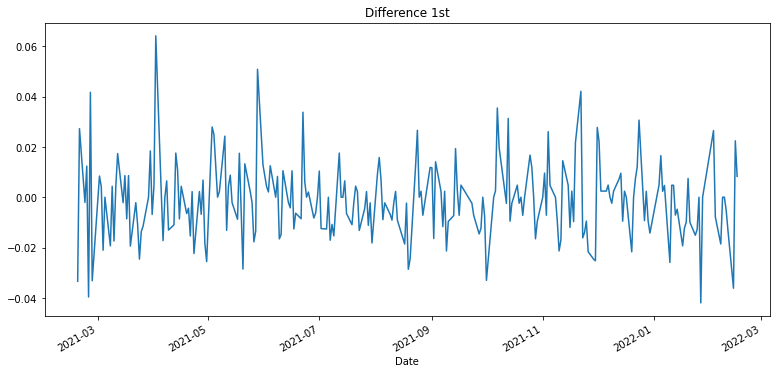

In [45]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.469660e+00
p-value                        5.094388e-11
#Lags Used                     1.500000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


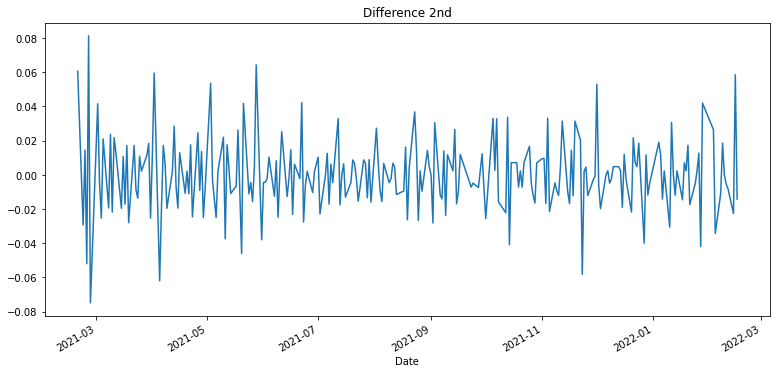

In [46]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [47]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(26, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(26, 1, 0)   Log Likelihood                 624.033
Date:                Thu, 17 Feb 2022   AIC                          -1194.067
Time:                        07:32:32   BIC                          -1102.316
Sample:                             0   HQIC                         -1157.020
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.068     -0.413      0.680      -0.162       0.106
ar.L2         -0.0582      0.072     -0.809      0.419      -0.199       0.083
ar.L3         -0.0618      0.076     -0.815      0.4

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


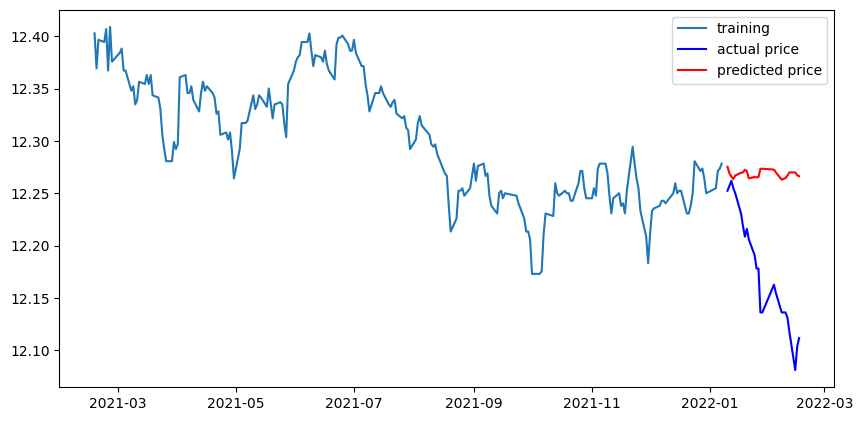

In [48]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  438694905.96251845
MAE:  18120.832874077303
RMSE:  20945.04490237532
MAPE: 9.62%


MAPE 값이 9.62%이다. p, d, q의 값을 정말 많이 수정했지만, 이것이 최선인 것 같다. p값은 시차 p 이후에 0이 나오는 값들을 모두 넣어봤지만 MAPE 값 10% 안으로 들어오지 못했고, 그래프 범위를 넘어가는 26을 선택했다. 시차 p 이후에 0이 나오는 값들의 생성 주기를 이용해서 26을 선정했는데, 유일하게 MAPE 값이 10% 안으로 들어왔다. d값과 q값은 각각 1, 0이 안정적이었다. d값 같은 경우에는 1이상의 숫자를 사용하면 MAPE 값이 오를뿐만 아니라 그래프 내 'predicted price'가 실제 가격과 반대가 된다. 주가가 실제로 내려가고 있는데, 올라가는 것으로 예측하면 굉장히 끔찍하다.

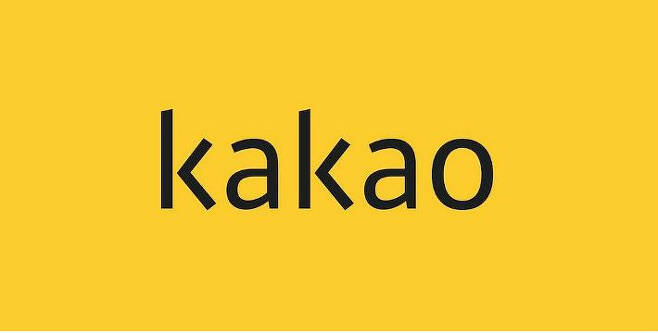

In [50]:
# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/035720.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-17    101800.0
2021-02-18    100200.0
2021-02-19    100800.0
2021-02-22     98100.0
2021-02-23     97400.0
Name: Close, dtype: float64

In [51]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [52]:
ts.isnull().sum()

0

In [53]:
# 로그 변환 시도 
ts_log = np.log(ts)

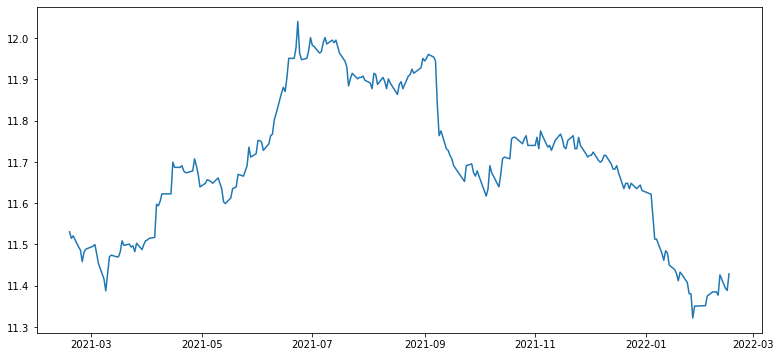

In [54]:
plt.plot(ts_log)

In [55]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('완료')

완료


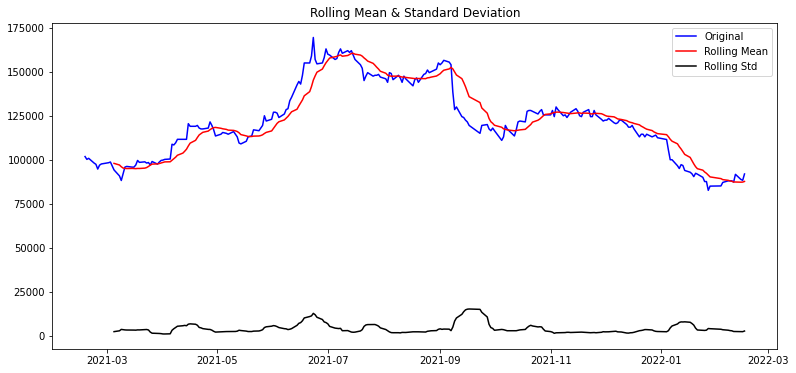

In [56]:
plot_rolling_statistics(ts, window=12)

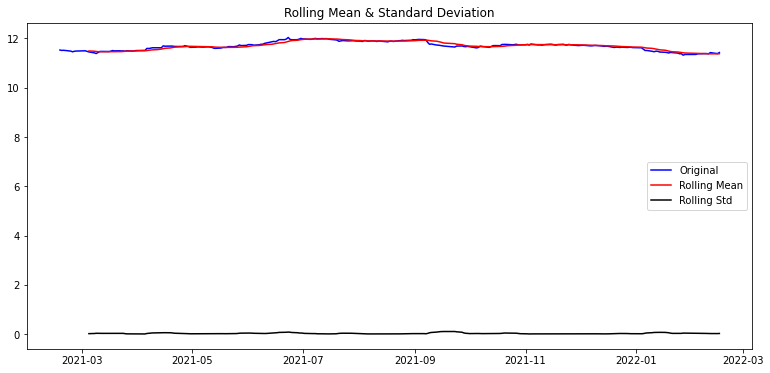

In [57]:
plot_rolling_statistics(ts_log, window=12)

In [58]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('완료')

완료


In [59]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.160816
p-value                          0.690221
#Lags Used                       3.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [60]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.567362
p-value                          0.499965
#Lags Used                       7.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


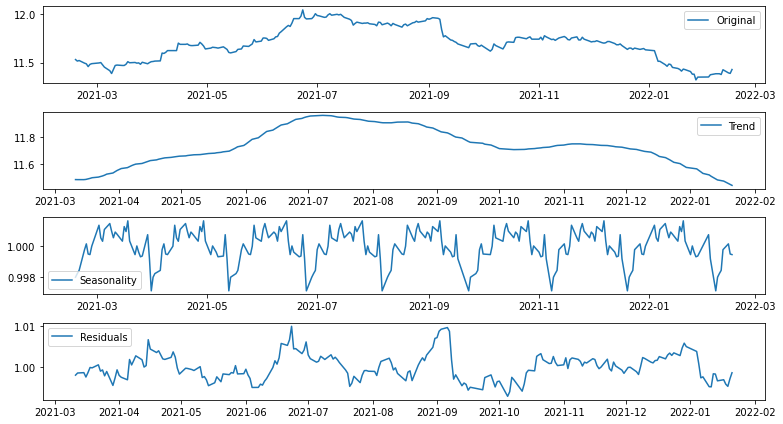

In [61]:
# 정성적 그래프 분석
# plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
# augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

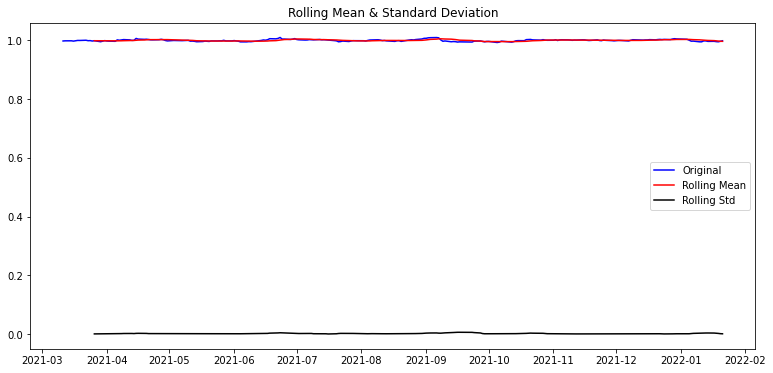

In [62]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [63]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.259879
p-value                          0.000521
#Lags Used                       3.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


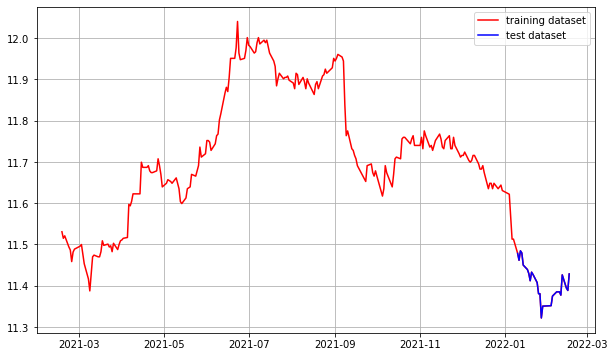

In [64]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

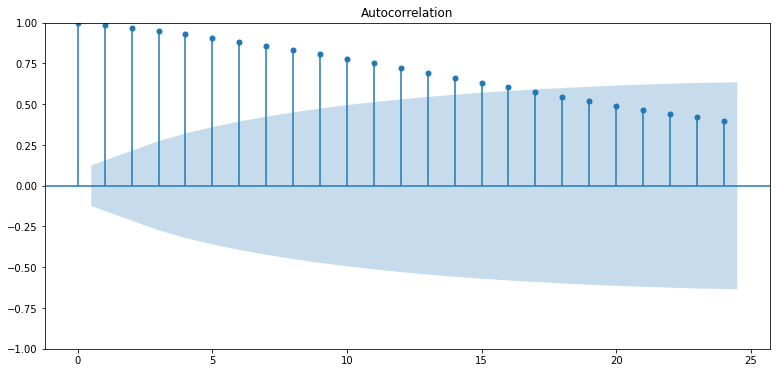

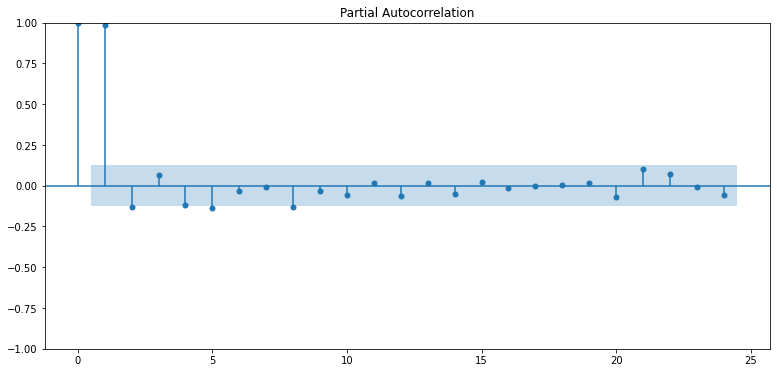

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -7.877869e+00
p-value                        4.789892e-12
#Lags Used                     2.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


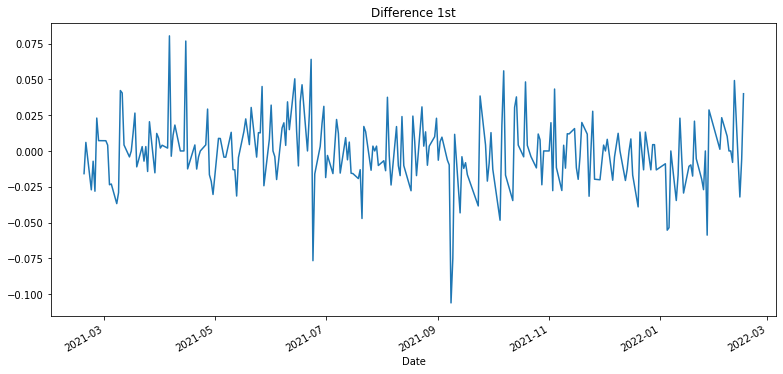

In [66]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.173869e+01
p-value                        1.289151e-21
#Lags Used                     5.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


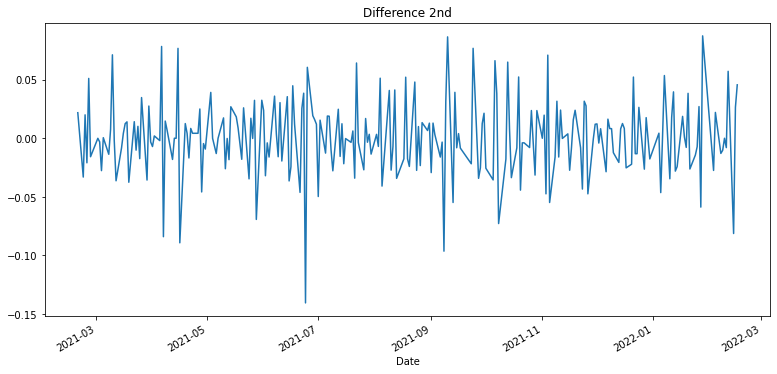

In [67]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [68]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(26, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(26, 1, 0)   Log Likelihood                 528.512
Date:                Thu, 17 Feb 2022   AIC                          -1003.023
Time:                        07:32:42   BIC                           -911.273
Sample:                             0   HQIC                          -965.976
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0750      0.066      1.142      0.254      -0.054       0.204
ar.L2         -0.0923      0.096     -0.963      0.336      -0.280       0.096
ar.L3          0.1465      0.086      1.709      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


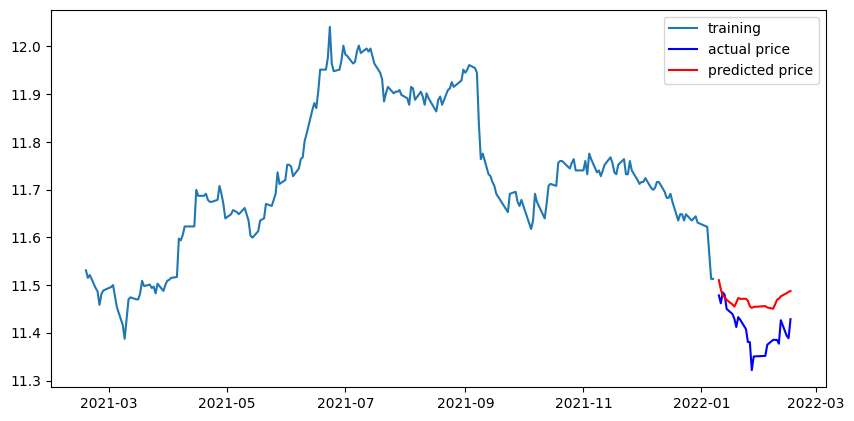

In [69]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  40074361.858797945
MAE:  5606.689289915886
RMSE:  6330.431411744222
MAPE: 6.35%


MAPE 값이 6.35%이다. 그래프도 'predicted price'가 실제가격과 비슷하게 흘러가고 있다. p값은 1, 3, 22 정도의 후보가 있었지만, 그래프를 벗어나는 26이 가장 효과적이었다. d값과 q값은 알아본 결과, 각각 1과 0이 가장 안정적이다.

## 참고용) 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?

안정적이지 않은 시계열을 분석하기위해 안정적인 시계열로 바꾸어야 한다.

1) 정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도  
2) 시계열 분해(Time series decomposition) 기법을 적용

1-1 로그함수 변환

In [71]:
# ts_log = np.log(ts2)                 #시간 추이에 따라 분산이 점점 커질때 로그함수로 변환시킨다.
# plt.plot(ts_log)

In [72]:
# augmented_dickey_fuller_test(ts_log)     # 로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test를 수행한다.

1-2. Moving average 제거 - 추세(Trend) 상쇄하기

시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 한다. 이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주면 어떨까?

In [73]:
# moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기
# plt.plot(ts_log)
# plt.plot(moving_avg, color='red')

In [74]:
# ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
# ts_log_moving_avg.head(15)

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했다. 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점이다.

이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거한다.

In [75]:
# ts_log_moving_avg.dropna(inplace=True)
# ts_log_moving_avg.head(15)

메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석한다.

In [76]:
# plot_rolling_statistics(ts_log_moving_avg)

In [77]:
# augmented_dickey_fuller_test(ts_log_moving_avg)

이 과정을 거치고 나면 p-value가 안정적이게 되고, 이 time series는 stationary하다고 볼 수 있게 될 것이다.

한 가지 잊지 말아야 할 점은 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점이다.(현 프로젝트 한정)

위 코드에서 window=6을 적용해본다고 가정하겠다.

그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만, Augmented Dickey-Fuller Test의 결과 p-value가 올라가서 안정적 시계열이라고 말할 수 없게 된다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같다만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 두어야 한다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였다. 그러나 여전히 안정적인 시계열이라고 하기에는 부족하다.

1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소이다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과이다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 한다.

[시계열 패턴이란?][1]

[1]:https://otexts.com/fppkr/tspatterns.html

이런 패턴을 상쇄하기 위해 효과적인 방법에는 차분(Differencing)이 있다. 마치 미분(Differentiation)을 떠올리게 하는 개념이다. 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법이다. 이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 이번 스텝에서 발생한 변화량을 의미하게 된다.

우선 시프트한 시계열과 원본 시계열에 대한 그래프를 그려보자.

In [78]:
# ts_log_moving_avg_shift = ts_log_moving_avg.shift()

# plt.plot(ts_log_moving_avg, color='blue')
# plt.plot(ts_log_moving_avg_shift, color='green')

원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해 보자.

In [79]:
# ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
# ts_log_moving_avg_diff.dropna(inplace=True)
# plt.plot(ts_log_moving_avg_diff)

이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해 보자.

In [80]:
# plot_rolling_statistics(ts_log_moving_avg_diff)

차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [81]:
# augmented_dickey_fuller_test(ts_log_moving_avg_diff)

이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄하면, p-value가 줄어든 것을 볼 수 있을 것이다.

데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모른다.

2. 시계열 분해(Time series decomposition)

시계열 분해는 삼성, 현대자동차, 카카오 데이터를 이용해서 해보았기 때문에 설명을 생략한다.

EXPLORATION 11 회고

●이번 프로젝트에서 어려웠던 점

시계열 예측이라는 개념 자체가 무엇인지는 잘 이해했다. 하지만 수학적인 부분이 나오는 순간, 이해하는 것이 제한됐다.  분산(Variance), 공분산(Covariance), 상관계수(Correlation), 자기공분산(Autocovariance), 자기상관계수(Autocorrelation)이라는 개념들이 어려웠다. 당장 이해해도 시간이 지나면 헷깔린다. 읽고 또 읽어서 이해하는 것이 필요하다.

[Covariance와 Correlation][1]

[1]:https://destrudo.tistory.com/15

●프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

ARIMA 모델의 모수는 p, d, q다. 이 중 p와 q를 정할 때 일반적으로 p + q < 2, p * q = 0 인 값을 사용하며 p 나 q 중 하나는 0이라는 뜻이라고 되어 있다. 이 이론대로 모수를 정하면 MAPE 값이 잘 나오긴 하지만, 이 이론을 따르지 않을 때 더 잘나오는 것을 확인했다. 신기하게도 각 회사마다 데이터가 다름에도 불구하고, 이 이론을 따르지 않을 때 결과가 더 잘나왔다. 이론은 정형적인 정답만 알려줄 뿐, 더 좋은 정답도 있을 수 있다는 것을 알아간다.

●루브릭 평가 지표를 맞추기 위해 시도한 것들

시계열 안정성을 확보하고, 내 나름대로 ARIMA 모델 모수선택을 하였다. 마지막으로 NAPE 15% 미만의 정확도를 만들어냈다. 사실 데이터가 들쭉날쭉하지 않아서 그런지, 모수를 어떤 것으로 설정해도 15% 미만의 정확도가 나왔다. 물론 10% 미만으로 나오게 하기 위해서는 모수를 잘 선택하는 것이 좋다.

●자기 다짐

이론은 살짝 어렵지만 코드구현은 재밌는 프로젝트였다. 어렵더라도 끝까지 끌고가야하는 것을 느낀다. 이 모델을 이용해서 주식에 사용해보면 어떨지 생각을 해보았는데 더 보완하지 않은 이상, 절대 안될 것 같다. 훈련을 잘해도 실전은 다르다.

이번 프로젝트를 통해서 시계열 데이터를 처리하는 재미를 느꼈다. 다음에 관련 프로젝트를 하게 되면, 두 손들고 환영까지는 아니더라도 의지를 가지고 할 수 있을 것 같다. 